# Intro

While implementing the algorithms yourself is important to gain deeper understanding of it, it's also important to be able to use tools adapted in the industry. In this notebook i will demonstrate linear regression using scikit-learn, PyTorch and Tensorflow libraries.<br>
<br>
<u>Important note:</u> this is just a demo of fitting linear regression model on random generated data. I will not go through the whole procedure of loading data, data exploration, visualization and analysis. I will leave that for another notebook.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Generate random data
a = 10.2
b = 3.4

x = np.linspace(0, 6, 100).reshape((-1, 1))
e = np.random.randint(-10, 10, x.shape)
y = a*x + b + e

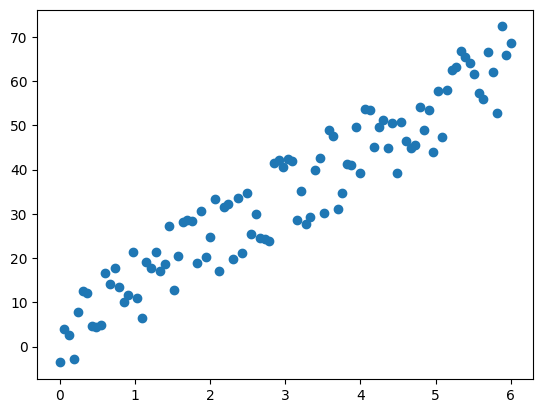

In [2]:
# Visualize data
plt.scatter(x, y)
plt.show()

# Scikit-learn

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_regression = LinearRegression()
linear_regression.fit(x, y)

LinearRegression()

In [9]:
# Retrieve weight (coefficient) and bias (intercept) of the linear model
w = linear_regression.coef_
b = linear_regression.intercept_

print(f"Weights: {w}")
print(f"Bias: {b}")

Weights: [[10.27920792]]
Bias: [2.36237624]


In [18]:
# Predict values using our model, by explicitly using parameters
y_pred_wb = w*x + b

# Predict values using linear regression object's method
y_pred = linear_regression.predict(x)

print(f"y_pred_wb == y_pred_method: {all(y_pred_wb == y_pred)}")

y_pred_wb == y_pred_method: True


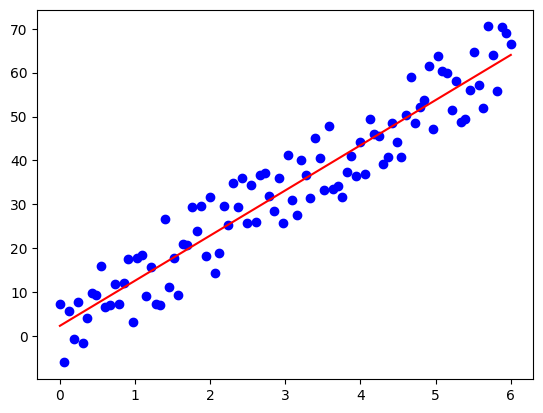

In [19]:
# Visualize
plt.scatter(x, y, color='b')
plt.plot(x, y_pred, color='r')

plt.show()

In [22]:
# Calculate the error value:
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 33.04079807980798


# PyTorch

In [3]:
import torch

# Define the model as single Linear transformation
model = torch.nn.Linear(in_features=1, out_features=1, bias=True)

# Define loss function - Mean Squared Error
loss_func = torch.nn.MSELoss()

# Define optimizer - Stochastic Gradient Descent
alpha = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=alpha)

# Convert input and output data from numpy arrays to tensors
x_pt = torch.from_numpy(x).float()
y_pt = torch.from_numpy(y).float()

In [8]:
# Training
num_epochs = 10

for epoch in range(num_epochs):
    # Clear gradient buffers
    optimizer.zero_grad()
    
    # Forward pass
    y_pred_pt = model(x_pt)

    # Backward pass
    # Get loss
    loss = loss_func(y_pred_pt, y_pt)
    # Get gradients with respect to parameters
    loss.backward()

    # Update parameters
    optimizer.step()

    if (epoch + 1) % 1 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}] loss - {loss.item()}")

Epoch [1/10] loss - 35.2690315246582
Epoch [2/10] loss - 35.261966705322266
Epoch [3/10] loss - 35.25495910644531
Epoch [4/10] loss - 35.24802780151367
Epoch [5/10] loss - 35.24116134643555
Epoch [6/10] loss - 35.2343635559082
Epoch [7/10] loss - 35.227630615234375
Epoch [8/10] loss - 35.22096252441406
Epoch [9/10] loss - 35.21435546875
Epoch [10/10] loss - 35.20781326293945


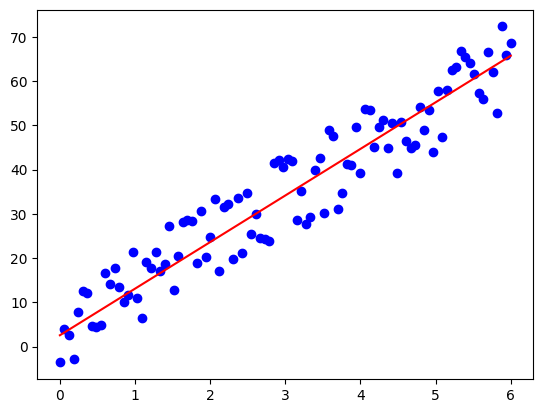

In [9]:
# Visualize results

y_pred_np = y_pred_pt.detach().numpy()

plt.scatter(x, y, color='b')
plt.plot(x, y_pred_np, color='r')

plt.show()

# TensorFlow

In [17]:
import tensorflow as tf

# Convert input and output variables to tensors
x_tf = tf.convert_to_tensor(x, dtype=tf.float32)
y_tf = tf.convert_to_tensor(y, dtype=tf.float32)

# Define model parameter variables
w = tf.Variable(initial_value=0.0)
b = tf.Variable(initial_value=0.0)

# Model function
def tf_linear_model_output(x):
    """Calculate linear model output using Tensorflow variables."""
    return w * x + b


# Loss function definition
def tf_mse(y_pred, y_true):
    """Calculate mean squared error using Tensorflow."""
    return tf.reduce_mean((y_pred - y_true)**2)


# Training hyperparameters
alpha = 0.01
num_steps = 30

optimizer = tf.optimizers.SGD(learning_rate=alpha)

# Training the model
for step in range(num_steps):
    # GradientTape records operations executed during forward pass
    # this is an equivalent of PyTorch autograd
    # it is done for automatic differential calculation
    with tf.GradientTape() as tape:
        y_pred_tf = tf_linear_model_output(x=x_tf)
        loss = tf_mse(y_pred=y_pred_tf, y_true=y_tf)
    
    # Compute derivative of loss with respect to weight and bias vars
    gradients = tape.gradient(loss, [w, b])

    # Update model parameters using gradients and the optimizer
    optimizer.apply_gradients(zip(gradients, [w, b]))

    if (step + 1) % 1 == 0:
        print(f"Epoch [{step + 1}/{num_steps}] loss - {loss.numpy()}")

print(f"Learned parameters: w = {w.numpy()}, b = {b.numpy()}")




Epoch [1/30] loss - 1541.6373291015625
Epoch [2/30] loss - 868.043701171875
Epoch [3/30] loss - 495.6219787597656
Epoch [4/30] loss - 289.7134094238281
Epoch [5/30] loss - 175.86734008789062
Epoch [6/30] loss - 112.92125701904297
Epoch [7/30] loss - 78.1169662475586
Epoch [8/30] loss - 58.871883392333984
Epoch [9/30] loss - 48.2292366027832
Epoch [10/30] loss - 42.3427848815918
Epoch [11/30] loss - 39.085975646972656
Epoch [12/30] loss - 37.283077239990234
Epoch [13/30] loss - 36.28404235839844
Epoch [14/30] loss - 35.729469299316406
Epoch [15/30] loss - 35.420658111572266
Epoch [16/30] loss - 35.247745513916016
Epoch [17/30] loss - 35.149986267089844
Epoch [18/30] loss - 35.09379959106445
Epoch [19/30] loss - 35.06062316894531
Epoch [20/30] loss - 35.040184020996094
Epoch [21/30] loss - 35.02680587768555
Epoch [22/30] loss - 35.01735305786133
Epoch [23/30] loss - 35.01008987426758
Epoch [24/30] loss - 35.004058837890625
Epoch [25/30] loss - 34.99873352050781
Epoch [26/30] loss - 34.99

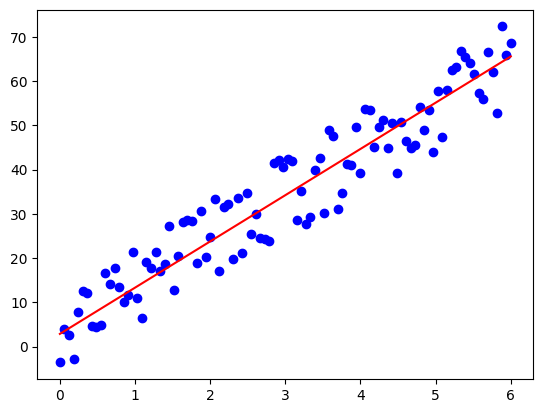

In [18]:
# Visualize results

y_pred_np = y_pred_tf.numpy()

plt.scatter(x, y, color='b')
plt.plot(x, y_pred_np, color='r')

plt.show()